<a href="https://colab.research.google.com/github/thenameisAnurag/BigData/blob/main/Multivariant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   R&D Spend        50 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            50 non-null     object 
 5   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB
Accuracy: 0.9569932140607239


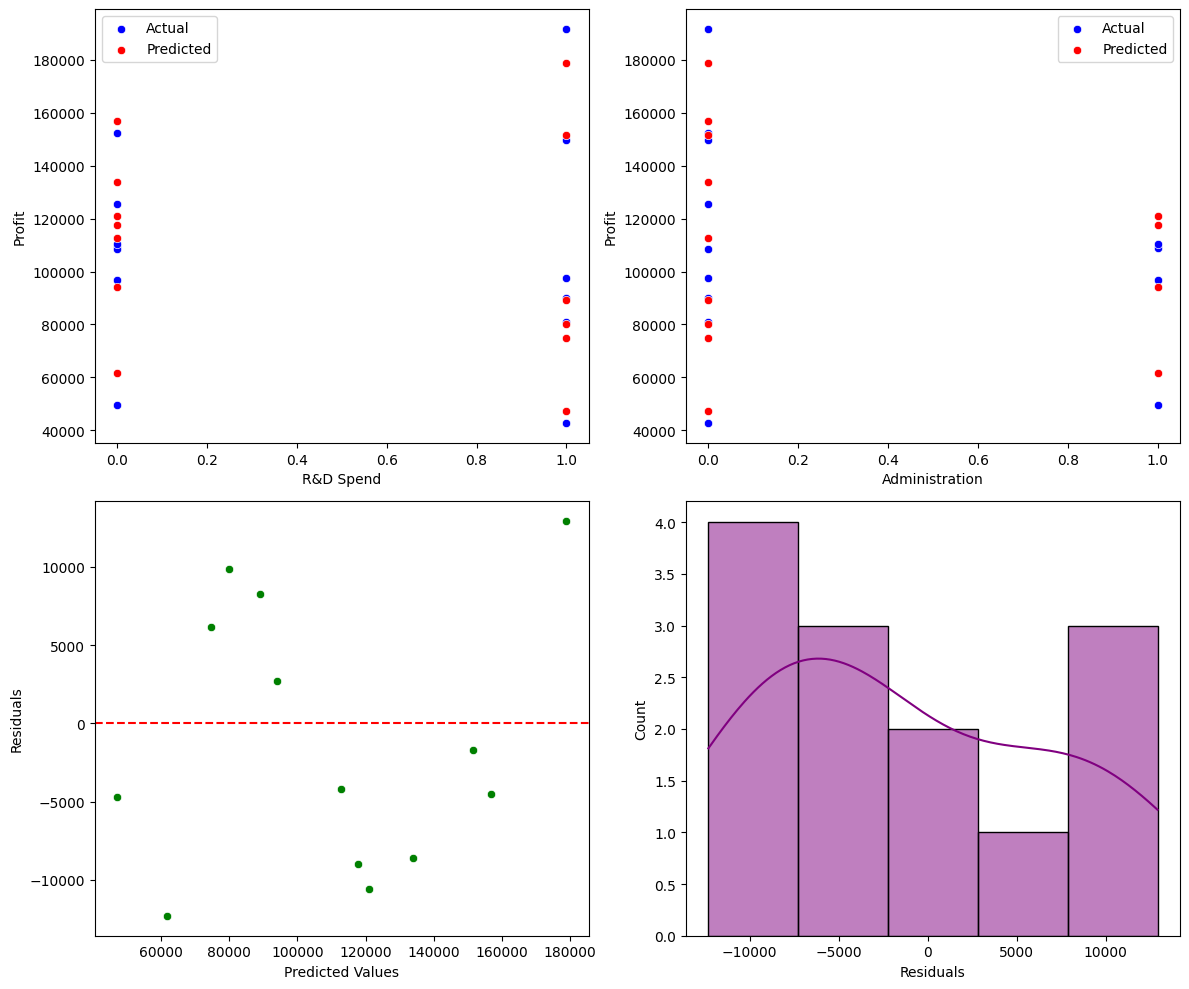

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Read Data from CSV
dataset = pd.read_csv('/content/50_Startups_dataset.csv')

# Preprocessing Data
dataset.isna().sum()
dataset.info()

# Separate features and target variable
X = dataset.drop('Profit', axis=1)
y = dataset['Profit']

# Encoding the Categorical Features
categorical_feature = ["State"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_feature)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)

# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.25, random_state=2509)

# Applying Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluating the Model
accuracy = regressor.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predicting the Outputs on Test data
y_pred = regressor.predict(X_test)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot of R&D Spend vs. Profit
sns.scatterplot(x=X_test[:, 0], y=y_test, ax=axes[0, 0], color='blue', label='Actual')
sns.scatterplot(x=X_test[:, 0], y=y_pred, ax=axes[0, 0], color='red', label='Predicted')
axes[0, 0].set_xlabel('R&D Spend')
axes[0, 0].set_ylabel('Profit')
axes[0, 0].legend()

# Scatter plot of Administration vs. Profit
sns.scatterplot(x=X_test[:, 1], y=y_test, ax=axes[0, 1], color='blue', label='Actual')
sns.scatterplot(x=X_test[:, 1], y=y_pred, ax=axes[0, 1], color='red', label='Predicted')
axes[0, 1].set_xlabel('Administration')
axes[0, 1].set_ylabel('Profit')
axes[0, 1].legend()

# Residual plot
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1, 0], color='green')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')

# Distribution of residuals
sns.histplot(residuals, ax=axes[1, 1], kde=True, color='purple')
axes[1, 1].set_xlabel('Residuals')

plt.tight_layout()
plt.show()
